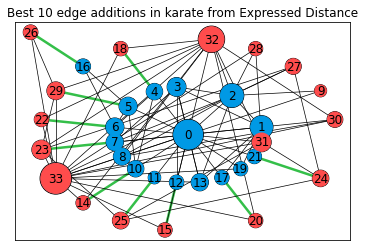

In [36]:
import networkx as nx
from __load_graph_data__ import load_graph
from __graph_embeddings__ import graph_embeddings
import pickle
dataset = 'karate'
algorithm = 'Expressed Distance'
g = load_graph(f'../datasets/{name}.gml')
title = f"Best 10 edge additions in karate from {algorithm}"
img_name = f'{dataset}'+f'_{algorithm}_edge_vis'

mode = True
with open(f"../pickles/{dataset}/normal/{dataset}_info", 'rb') as fp:
    info = pickle.load(fp)
    
tuples = info[f'{algorithm}_{dataset}_10']['result_dictionary']  

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np


edge_colors = []
edge_weights = []
g = g.copy()

# get all the node values
node_values = nx.get_node_attributes(g, 'value')

# store the values that will color the nodes
# according to their polarity
node_colors = []

for polarization_value in node_values.values():
    if polarization_value > 0:
        node_colors.append('#FF4C4C')
    else:
        node_colors.append('#0099E5')



tuples = [tuple(sorted(tup)) for tup in tuples]
g.add_edges_from(tuples)

# keep same layout
# pos = nx.spring_layout(g_top, scale=15)
pos = nx.nx_agraph.graphviz_layout(g, prog='twopi')

for edge in g.edges:
    if edge in tuples:
        if mode:
            edge_colors.append('#34BF49')
        else:
            edge_colors.append('#D01C1FFF')
        edge_weights.append(2.5)
    else:
        edge_colors.append('black')
        edge_weights.append(0.7)

# bigger nodes -> more central
pr = nx.pagerank(g)
nodes = nx.draw_networkx_nodes(g,
                               pos,
                               node_size=[11000 * v for v in pr.values()])
nodes.set_edgecolor('black')
nx.draw_networkx(g,
                 node_color=node_colors,
                 edge_color=edge_colors,
                 with_labels=True,
                 linewidths=1,
                 pos=pos,
                 node_size=[10000 * v for v in pr.values()],
                 width=edge_weights)
plt.title(f'{title}')
plt.savefig(f'../figures_generated/{img_name}.pdf', dpi=100)
plt.show()